# Market Segmentation on Fast food dataset

### Read and Explore Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')

In [3]:
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
print(pd.isnull(df).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [6]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


#### Converting Categorical Data into Numrical Data

In [7]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [8]:
# Print the encoded data
print(df)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  Like  Age  VisitFrequency  Gender  
0             1        0           0     6   61  

In [9]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,4.636614,44.604955,2.637990,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.446175,14.221178,1.756057,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,45.000000,3.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,57.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,71.000000,5.000000,1.000000


### Principal Component Analysis

In [10]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(df)

# Get the principal components
components = pca.components_

# Get the eigenvalues
eigenvalues = pca.explained_variance_


In [11]:
# Print the results
print('Principal components:')
print(components)
print('Eigenvalues:')
print(eigenvalues)

Principal components:
[[ 9.88564464e-03  1.45290042e-03 -2.99615908e-03  3.32689132e-03
   8.19627007e-03  4.38432326e-04 -5.79068550e-04  6.58975610e-03
   2.38245269e-03 -5.97095667e-04 -6.84070761e-04 -1.17914801e-02
  -9.99801912e-01  4.37054722e-03  6.94698999e-04]
 [-3.58468451e-02 -2.10129906e-02  1.27430280e-03 -6.07357977e-04
   1.67744837e-02 -6.01316800e-03 -8.89921120e-03 -4.01717587e-02
   1.28791569e-02 -3.51653816e-03  4.18031549e-02  9.96046926e-01
  -1.20586059e-02  4.56021094e-02  8.79906097e-04]
 [ 3.62383701e-03  2.64368195e-03  2.36612631e-03 -3.13484229e-04
   3.32740534e-03 -3.10285205e-03 -1.22378614e-02  1.56064751e-03
   6.79684424e-03  1.11759843e-03  4.02315838e-03  4.54743918e-02
  -4.81107674e-03 -9.98807365e-01  5.51631656e-03]
 [-4.11649081e-01 -1.29442741e-01 -8.97782006e-03  1.31278075e-01
   3.18311950e-01 -1.14644592e-01 -4.11878300e-01 -4.05570973e-01
   4.00719148e-01 -2.29226237e-01  3.24075863e-01 -6.35618257e-02
  -1.91404282e-03  5.70648310e-03

In [12]:
# Get the principal components
components = pca.components_

# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Get the standard deviation of each component
std = np.sqrt(eigenvalues)

# Print the summary
print('Number of components:', len(components))
print('Explained variance ratio:')
print(pca.explained_variance_ratio_)
print('Principal components:')
print(components)
print('Standard deviation of each component:')
print(std)

Number of components: 15
Explained variance ratio:
[9.22303196e-01 5.43995063e-02 1.39597297e-02 2.40154037e-03
 1.64192323e-03 1.10309036e-03 9.85301873e-04 7.00122541e-04
 5.09420791e-04 4.36645579e-04 3.62570162e-04 3.42364031e-04
 3.20004441e-04 2.80706891e-04 2.53877675e-04]
Principal components:
[[ 9.88564464e-03  1.45290042e-03 -2.99615908e-03  3.32689132e-03
   8.19627007e-03  4.38432326e-04 -5.79068550e-04  6.58975610e-03
   2.38245269e-03 -5.97095667e-04 -6.84070761e-04 -1.17914801e-02
  -9.99801912e-01  4.37054722e-03  6.94698999e-04]
 [-3.58468451e-02 -2.10129906e-02  1.27430280e-03 -6.07357977e-04
   1.67744837e-02 -6.01316800e-03 -8.89921120e-03 -4.01717587e-02
   1.28791569e-02 -3.51653816e-03  4.18031549e-02  9.96046926e-01
  -1.20586059e-02  4.56021094e-02  8.79906097e-04]
 [ 3.62383701e-03  2.64368195e-03  2.36612631e-03 -3.13484229e-04
   3.32740534e-03 -3.10285205e-03 -1.22378614e-02  1.56064751e-03
   6.79684424e-03  1.11759843e-03  4.02315838e-03  4.54743918e-02
 

In [13]:
""""
The first component explains the most variance in the data, with 92.23%.
This suggests that it is likely to be the most important component for understanding the data.
The second component explains 5.44% of the variance, and the third component explains 1.39%.
These components may also be important for understanding the data, but to a lesser extent
than the first component.The remaining components explain less than 1% of the variance, and are
likely to be less important for understanding the data.
To understand the importance of each component, we can look at the standard deviation
of each component. The standard deviation of a component is a measure of how spread out
the data is along that component. A high standard deviation indicates that the data is
spread out over a wide range, while a low standard deviation indicates that the data is clustered together.
The standard deviation of the first component is the highest, which suggests that the data is most spread
out along this component. This suggests that this component is likely to be the most important for
understanding the data. The standard deviation of the second component is also relatively high,
which suggests that this component may also be important for understanding the data.
The standard deviation of the remaining components is lower, which suggests that they may
be less important for understanding the data."""

'"\nThe first component explains the most variance in the data, with 92.23%.\nThis suggests that it is likely to be the most important component for understanding the data.\nThe second component explains 5.44% of the variance, and the third component explains 1.39%.\nThese components may also be important for understanding the data, but to a lesser extent\nthan the first component.The remaining components explain less than 1% of the variance, and are\nlikely to be less important for understanding the data.\nTo understand the importance of each component, we can look at the standard deviation\nof each component. The standard deviation of a component is a measure of how spread out\nthe data is along that component. A high standard deviation indicates that the data is\nspread out over a wide range, while a low standard deviation indicates that the data is clustered together.\nThe standard deviation of the first component is the highest, which suggests that the data is most spread\nout alo

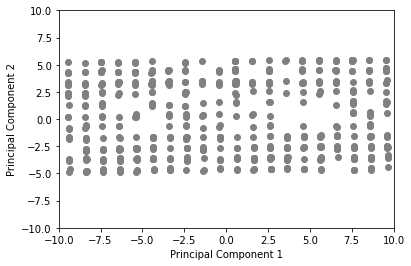

In [14]:

# Calculate the PCA
pca = PCA(n_components=2)
pca.fit(df)
components = pca.transform(df)

# Plot the projected data
plt.scatter(components[:, 0], components[:, 1], color="grey")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.show()

### Implement Clustering Algorithms

#### K-Means Clustering Algorithm

In [15]:
from sklearn.cluster import KMeans

# Create a KMeans model with 8 clusters.
km = KMeans(n_clusters=8)

# Fit the model to the data.
km.fit(df)

# Get the cluster labels.
labels = km.labels_



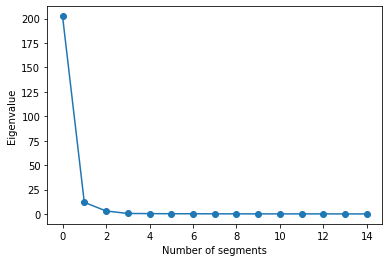

In [16]:
# Plot the scree plot.
plt.plot(eigenvalues, 'o-')
plt.xlabel('Number of segments')
plt.ylabel('Eigenvalue')
plt.show()

In [17]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

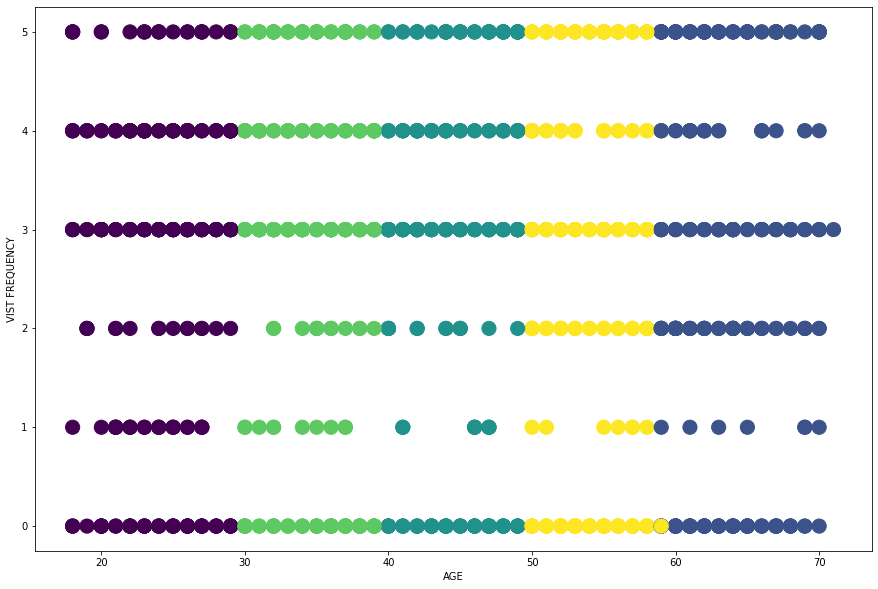

In [18]:
#create model
kmeans = KMeans(n_clusters=5)
data_predict = kmeans.fit_predict(df)

plt.figure(figsize=(15,10))
plt.scatter( x = 'Age' ,y = 'VisitFrequency' , data = df , c = data_predict , s = 200 )
plt.xlabel("AGE")
plt.ylabel("VIST FREQUENCY")
plt.show()

#### Hierarchical Clustering Algorithm

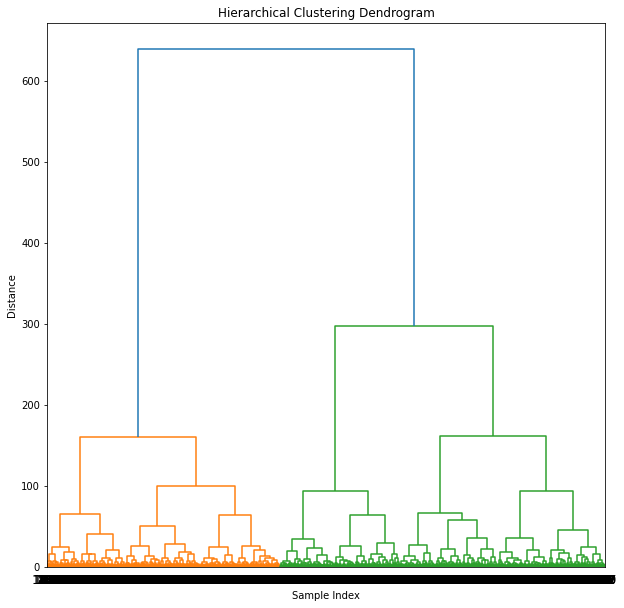

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Create the linkage matrix
Z = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=0, leaf_font_size=12)
plt.show()

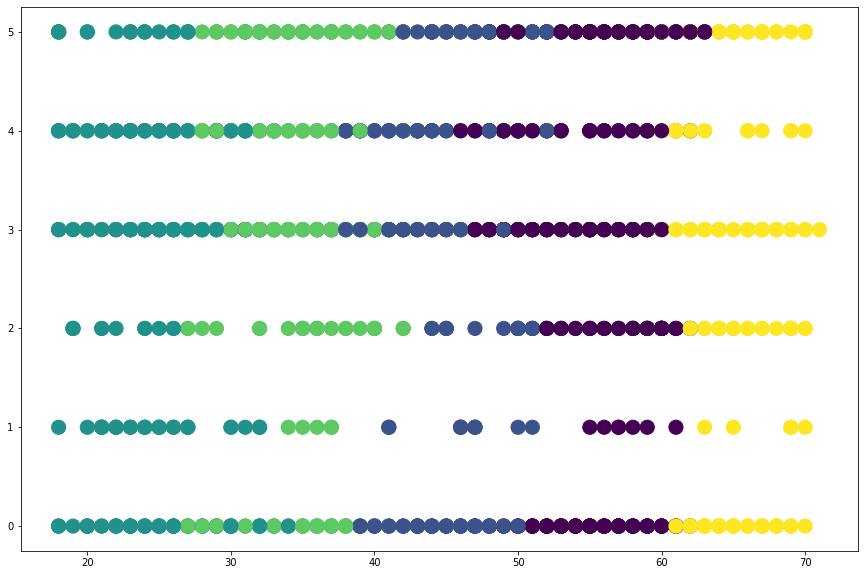

In [20]:
from sklearn.cluster import AgglomerativeClustering

#create model
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 5,affinity= "euclidean",linkage = "ward")
data_predict = hiyerartical_cluster.fit_predict(df)
plt.figure(figsize=(15,10))
plt.scatter( x = 'Age' ,y = 'VisitFrequency' , data = df , c = data_predict , s = 200 )
plt.show()

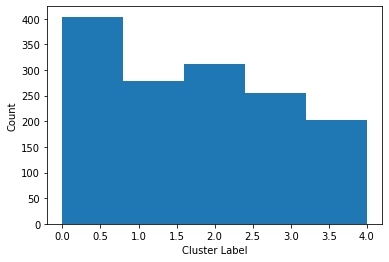

In [21]:
# Plot the histogram of the cluster labels
plt.figure()
plt.hist(data_predict, bins=5)
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()